In [1]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gmean
import sys
sys.path.insert(0,'../../../statistics_helper/')
pd.options.display.float_format = '{:,.1e}'.format
from CI_helper import *
from excel_utils import *

# Estimating the biomass of wild birds
To estimate the total biomass of wild birds, we rely on two estimates. 

## Estimate 1
The first is based on estimates of the total number of bird species reported in [Gaston & Blackburn](https://doi-org/10.1023/A:1018341530497). Gaston & Blackburn report an estimate of 2-4×10$^{11}$ for the total number of individual birds. We use the average values of this range which is ≈3×10$^{11}$ individual birds.

In [2]:
tot_num_birds = 3e11

To convert this total number of birds into an estimate of the total biomass of wild birds, we use data on the relation between population density and body weight reported in [Nee et al.](https://doi.org/10.1038/351312a0). Here is a sample of the data in Nee et al:

Text(0,0.5,'Population size')

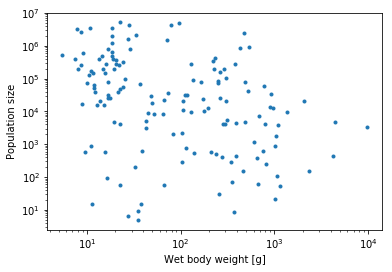

In [3]:
# Load Nee et al. data
nee = pd.read_excel('wild_bird_data.xlsx',skiprows=1)

# Plot data
plt.loglog(nee['Wet body weight [g]'],nee['Population size'],'.')
plt.xlabel('Wet body weight [g]')
plt.ylabel('Population size')

We use the weighted average weight of the bird species reported in Nee et al. as our best estimate of the average weight of individual birds. We convert the average wet weight to carbon mass assuming 70% water content and 50% carbon out of the dry weight.

In [4]:
wet_to_c = 0.15
avg_bird_cc = np.average(nee['Wet body weight [g]'],weights=nee['Population size'])*wet_to_c

We multiply our estimate of the total number of birds by our estimate of the average carbon content of a single bird to generate our estimate for the total biomass of wild birds:

In [5]:
estimate_1 = tot_num_birds*avg_bird_cc

print('Our best estimate for the total biomass of wild birds using method 1 is ≈%.3f Gt C' %(estimate_1/1e15))

Our best estimate for the total biomass of wild birds using method 1 is ≈0.004 Gt C


## Estimate 2
As an alternative estimate, we use data on the mass of individual birds for each bird species, the population density of each species, and the study area in which the population density was measured ([Novosolov et al.](http://dx.doi.org/10.1111/geb.12617)). This dataset included data on ≈350 mammal species. Using multiple regression, a power-law (log-log) functional relation was established between body mass, study area and the total number of individuals measured in the study area. The functional relation established is: $$log_{10}(number\ of\ individuals) = 3.26-0.3×log_{10}(body\ mass) + 0.63×log_{10}(study\ area), (R^2 ≈0.3)$$ 

This relation was used to extrapolate the total number of individuals for ≈75% of the total number of bird species, by using breeding range sizes data from Novosolov et al. as a surrogate for study area, and data on body mass ([Meiri et al.](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2699.2010.02390.x/full)). From total number of individuals the total biomass is calculated through multiplying the total number of individuals by the mean body mass. This approach yielded an estimate of ≈0.001 Gt C.

In [6]:
estimate_2 = 5012745870861*wet_to_c
print('Our best estimate for the total biomass of wild birds using method 2 is ≈%.3f Gt C' %(estimate_2/1e15))

Our best estimate for the total biomass of wild birds using method 2 is ≈0.001 Gt C


To generate our best estimate of the total biomass of wild birds, we use the geometric mean of the estimates based on the two methods

In [7]:
best_estimate = gmean([estimate_1,estimate_2])

print('Our best estimate for the total biomass of wild birds is ≈%.3f Gt C' %(best_estimate/1e15))

Our best estimate for the total biomass of wild birds is ≈0.002 Gt C


In [8]:
# Feed results to the chordate biomass data
old_results = pd.read_excel('../../animal_biomass_estimate.xlsx',index_col=0)
result = old_results.copy()
result.loc['Wild birds',(['Biomass [Gt C]','Uncertainty'])] = (best_estimate/1e15,None)
result.to_excel('../../animal_biomass_estimate.xlsx')

# Feed results to Table 1 & Fig. 1
update_results(sheet='Table1 & Fig1', 
               row=('Animals','Wild birds'), 
               col='Biomass [Gt C]',
               values=best_estimate/1e15,
               path='../../../results.xlsx')

# Feed results to Table S1
update_results(sheet='Table S1', 
               row=('Animals','Wild birds'), 
               col='Number of individuals',
               values=tot_num_birds,
               path='../../../results.xlsx')